
### **Steps for Predicting Diabetes**

#### **1. Data Preparation**
- **Dataset**: You can use the Pima Indians Diabetes Dataset or similar datasets. Ensure it has the mentioned attributes.
- **Handle Missing Values**: Some columns (e.g., skin fold thickness, serum insulin) might contain missing or zero values. Replace these with:
  - Mean/median for continuous variables.
  - Domain knowledge (if applicable).
- **Normalization/Scaling**: Normalize or scale numerical features to ensure the model performs optimally.
- **Train-Test Split**: Split the dataset into training (e.g., 80%) and test sets (e.g., 20%).

#### **2. Exploratory Data Analysis (EDA)**
- **Correlation Analysis**: Check how each feature correlates with the target variable (e.g., diabetes diagnosis).
- **Distribution Plots**: Use histograms or boxplots to understand the distribution of each feature.
- **Pair Plots**: Visualize relationships between multiple features.
- **Outliers**: Detect and handle outliers using Z-scores or IQR.

#### **3. Model Selection**
Choose machine learning models suited for binary classification:
- **Logistic Regression**: A baseline model for binary classification.
- **Random Forest**: Handles non-linear relationships and is robust to missing data.
- **XGBoost/LightGBM**: Powerful gradient boosting models.
- **Neural Networks**: For deep learning approaches, use a simple feedforward network initially.

#### **4. Model Training**
- Train the model using the training dataset.
- Use hyperparameter tuning (e.g., GridSearchCV, RandomizedSearchCV) to optimize parameters.

#### **5. Model Evaluation**
Evaluate the model on the test dataset using:
- **Accuracy**: Overall correctness of predictions.
- **Precision, Recall, and F1-Score**: For imbalanced datasets.
- **Confusion Matrix**: Analyze true positives, false positives, etc.
- **ROC and AUC**: Measure model performance.

#### **6. Feature Importance**
- Analyze which features most impact diabetes prediction. For tree-based models, you can extract feature importance scores.

#### **7. Deployment**
- Save the trained model using `joblib` or `pickle`.
- Deploy the model using a web framework like Flask or FastAPI.



### **Expected Output**
- **Accuracy**: Typically ranges from 70–80%, depending on the dataset and preprocessing.
- **Feature Importance**: Features like glucose concentration, BMI, and age usually have higher importance.



<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">import libraries</h2>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import joblib

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">loade the data </h2>

In [2]:
df = pd.read_csv('/kaggle/input/diabetes-classification-dataset/diabetesData.csv')

In [3]:
df.head()

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [4]:
df = pd.read_csv('/kaggle/input/diabetes-classification-dataset/diabetesData.csv')

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Exploratory data analysis</h2>

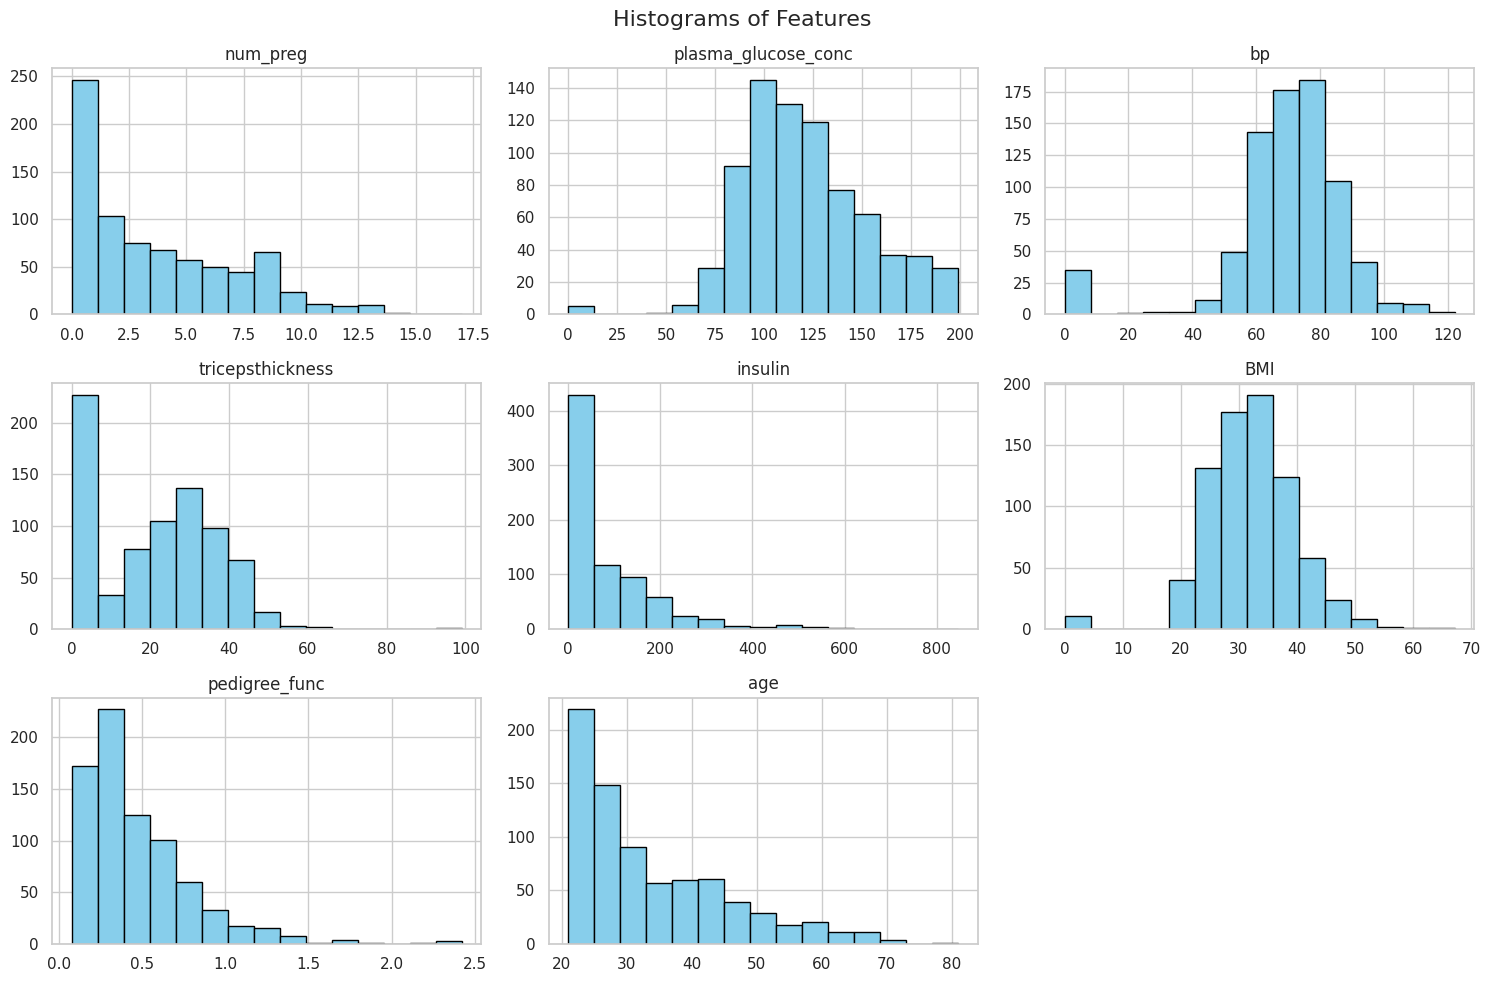

In [8]:
# Set Seaborn style
sns.set_theme(style="whitegrid")

# --- 1. Histogram ---
df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.tight_layout()
plt.show()

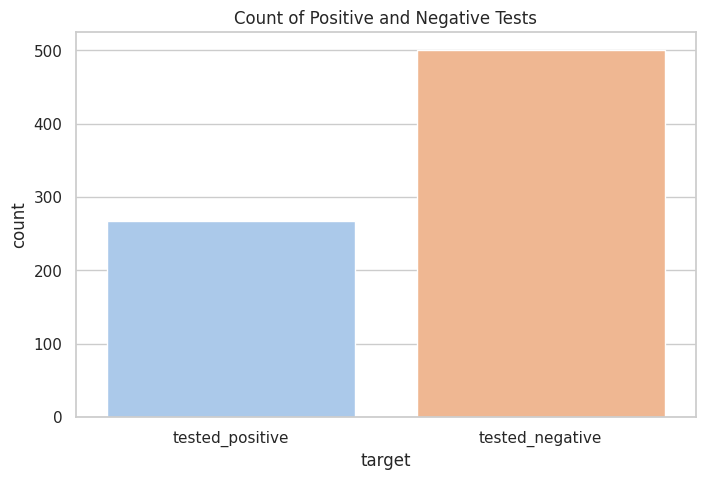

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target', palette='pastel')
plt.title("Count of Positive and Negative Tests")
plt.show()

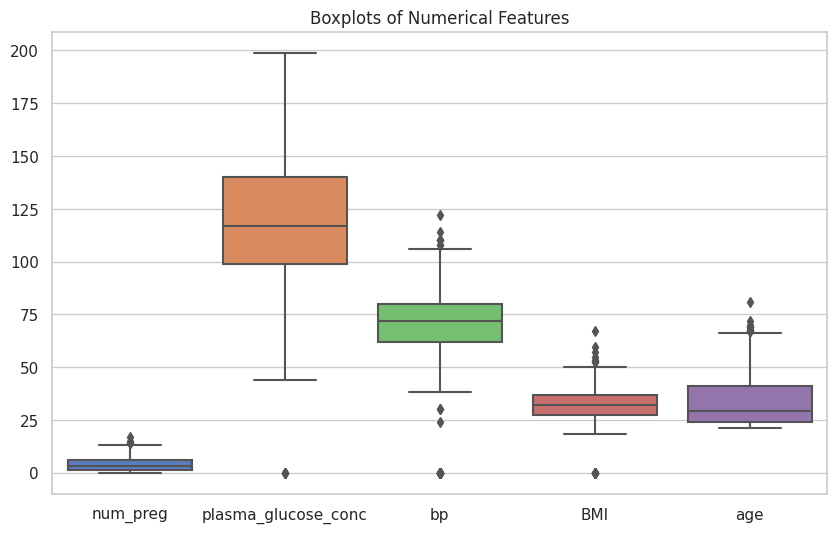

In [10]:
# --- 3. Boxplot ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['num_preg', 'plasma_glucose_conc', 'bp', 'BMI', 'age']], palette='muted')
plt.title("Boxplots of Numerical Features")
plt.show()

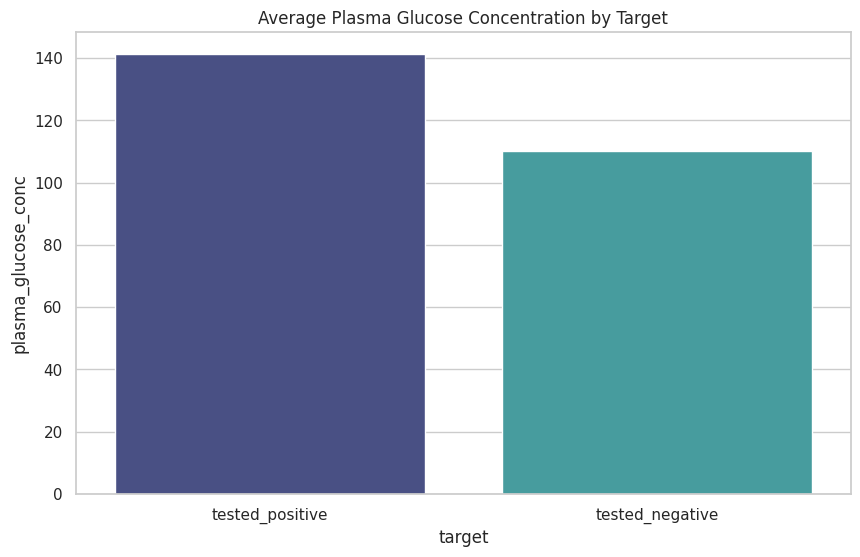

In [11]:
# --- 4. Bar Plot ---
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='target', y='plasma_glucose_conc', ci=None, palette='mako')
plt.title("Average Plasma Glucose Concentration by Target")
plt.show()

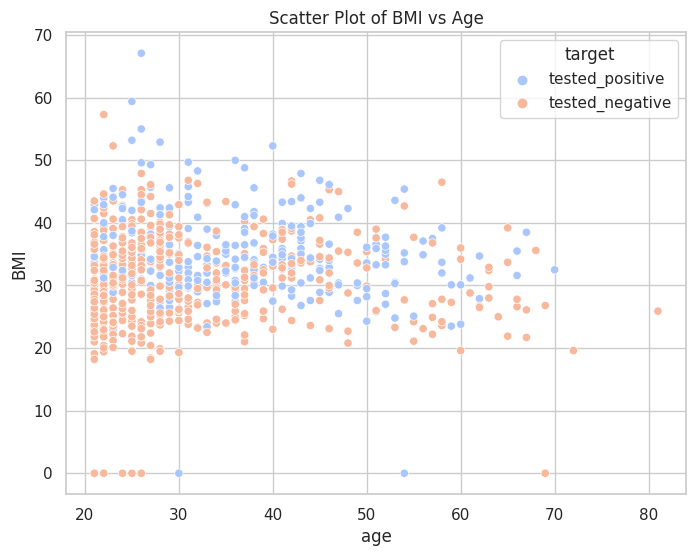

In [12]:
# --- 5. Scatter Plot ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='BMI', hue='target', palette='coolwarm')
plt.title("Scatter Plot of BMI vs Age")
plt.show()

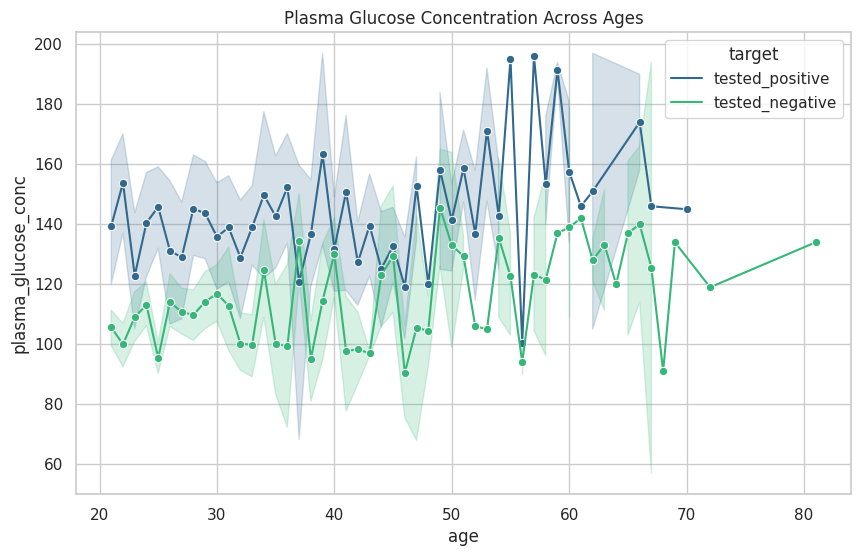

In [13]:
# --- 6. Line Plot ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='plasma_glucose_conc', hue='target', marker='o', palette='viridis')
plt.title("Plasma Glucose Concentration Across Ages")
plt.show()

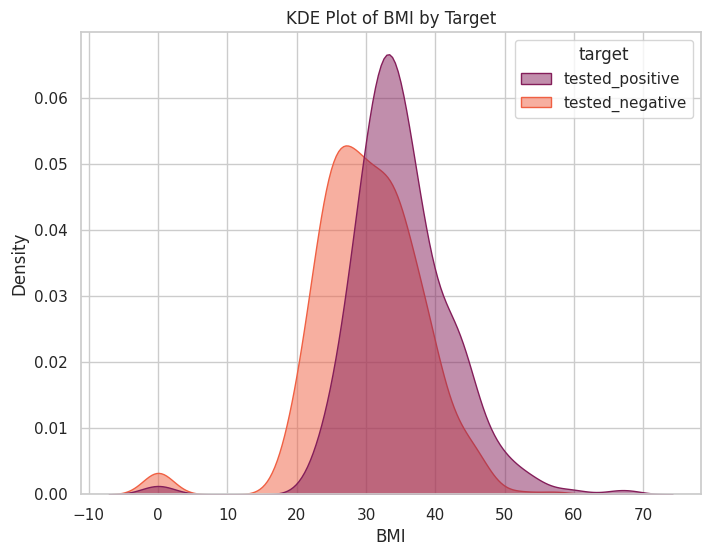

In [14]:
# --- 7. KDE Plot ---
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='BMI', hue='target', fill=True, common_norm=False, alpha=0.5, palette='rocket')
plt.title("KDE Plot of BMI by Target")
plt.show()

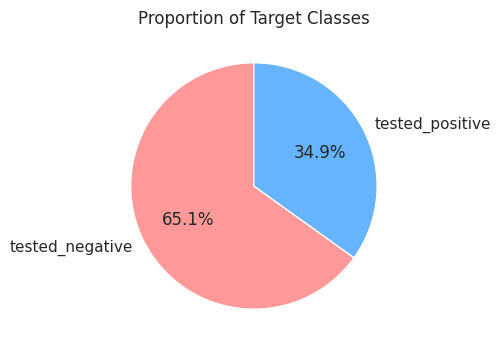

In [15]:
# --- 8. Pie Chart ---
target_counts = df['target'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90)
plt.title("Proportion of Target Classes")
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['target'] = label_encoder.fit_transform(df['target'])



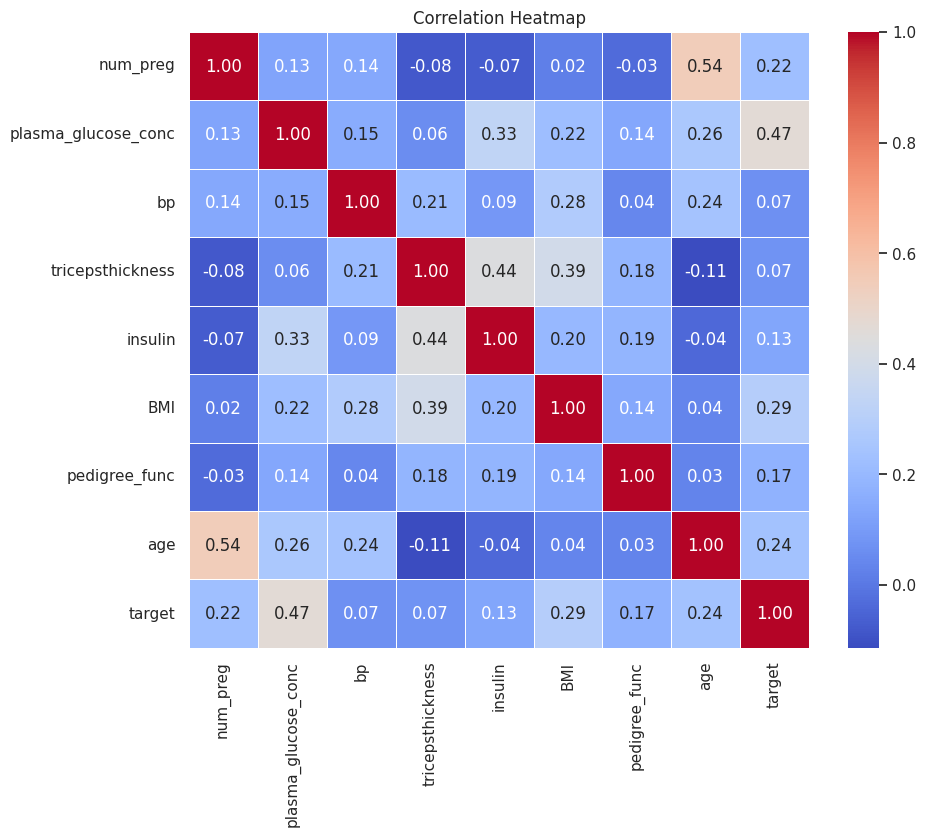

In [17]:
plt.figure(figsize=(10, 8))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">remove outlier</h2>

Original dataset shape: (636, 9)
Cleaned dataset shape: (636, 9)


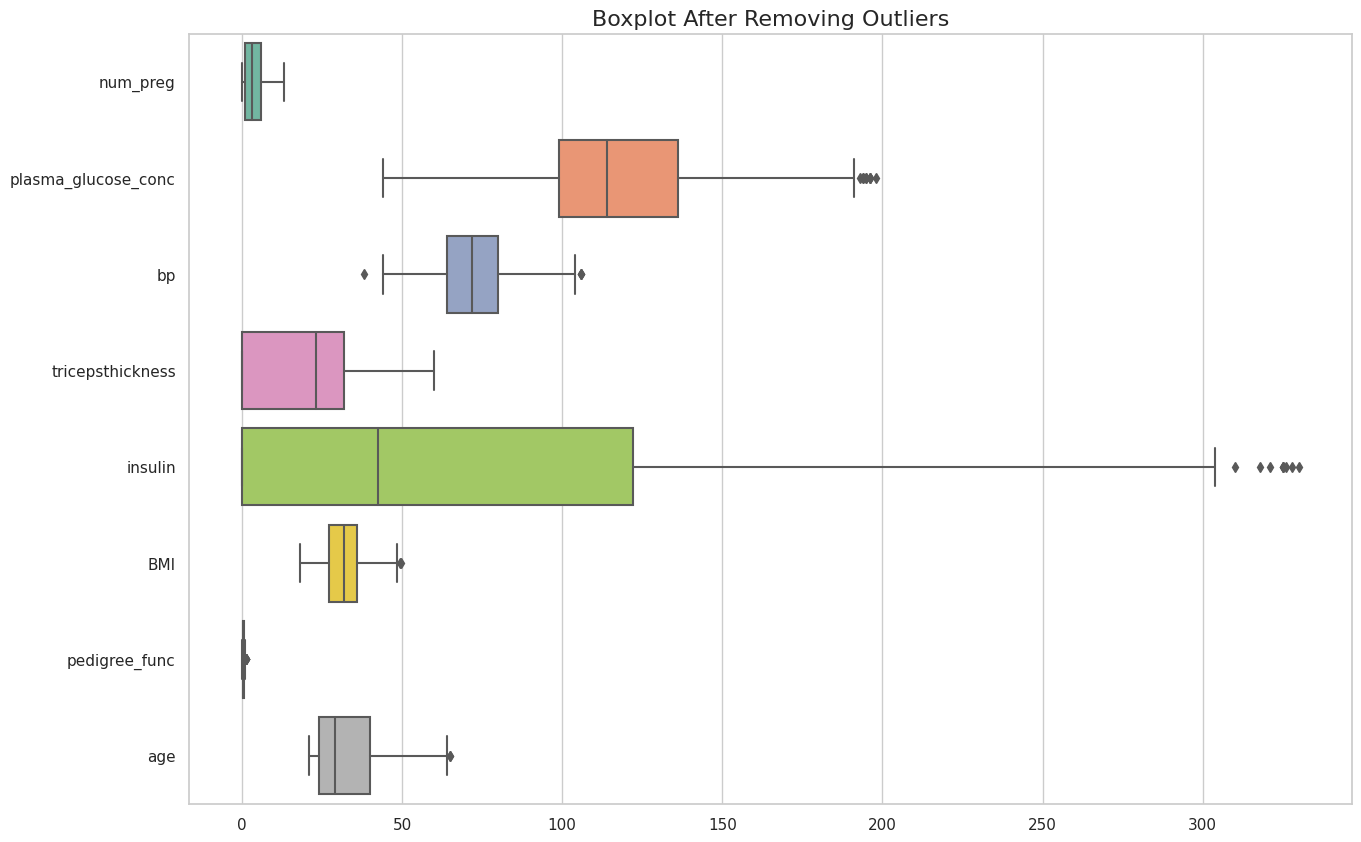

In [18]:
def remove_outliers(df, column):
    """
    Removes outliers from a column in a DataFrame using the IQR method.
    """
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df


numeric_columns = ['num_preg', 'plasma_glucose_conc', 'bp', 'tricepsthickness', 
                   'insulin', 'BMI', 'pedigree_func', 'age']





for col in numeric_columns:
    df = remove_outliers(df, col)


print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df.shape}")


plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns], orient='h', palette="Set2")
plt.title("Boxplot After Removing Outliers", fontsize=16)
plt.show()


<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">feature engineering</h2>

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# List of numerical columns
numeric_columns = ['num_preg', 'plasma_glucose_conc', 'bp', 'tricepsthickness', 
                   'insulin', 'BMI', 'pedigree_func', 'age']

# Apply Min-Max Scaling
df = df.copy()  # Create a copy of the dataset
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


print("Scaled Data (First 5 Rows):")
print(df.head())


print("\nMin-Max Values After Scaling:")
for col in numeric_columns:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")


Scaled Data (First 5 Rows):
   num_preg  plasma_glucose_conc        bp  tricepsthickness   insulin  \
0  0.461538             0.675325  0.500000          0.583333  0.000000   
1  0.076923             0.266234  0.411765          0.483333  0.000000   
2  0.615385             0.902597  0.382353          0.000000  0.000000   
3  0.076923             0.292208  0.411765          0.383333  0.284848   
5  0.384615             0.467532  0.529412          0.000000  0.000000   

        BMI  pedigree_func       age  target  
0  0.490446       0.506458  0.659091       1  
1  0.267516       0.251845  0.227273       0  
2  0.162420       0.547970  0.250000       1  
3  0.315287       0.082103  0.000000       0  
5  0.235669       0.113469  0.204545       0  

Min-Max Values After Scaling:
num_preg: Min = 0.0, Max = 1.0
plasma_glucose_conc: Min = 0.0, Max = 1.0
bp: Min = 0.0, Max = 1.0
tricepsthickness: Min = 0.0, Max = 1.0
insulin: Min = 0.0, Max = 1.0
BMI: Min = 0.0, Max = 1.0
pedigree_func: Min = 

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">splite the dataset</h2>

In [20]:
X = df[numeric_columns]
y = df['target']

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Define model</h2>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier()
}

In [22]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    acc = accuracy_score(y_test, y_pred)  # Evaluate accuracy
    results[name] = acc  # Store the result
    print(f"{name} Accuracy: {acc:.2f}")


Logistic Regression Accuracy: 0.81
Random Forest Accuracy: 0.77
Support Vector Machine Accuracy: 0.76
Decision Tree Accuracy: 0.72
K-Nearest Neighbors Accuracy: 0.77
Naive Bayes Accuracy: 0.74
Gradient Boosting Accuracy: 0.80
AdaBoost Accuracy: 0.73
XGBoost Accuracy: 0.73
[LightGBM] [Info] Number of positive: 157, number of negative: 351
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 579
[LightGBM] [Info] Number of data points in the train set: 508, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.309055 -> initscore=-0.804540
[LightGBM] [Info] Start training from score -0.804540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [23]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.2f}")


Best Model: Logistic Regression with Accuracy: 0.81


In [24]:
# Step 10: Detailed Evaluation of the Best Model
y_pred_best = best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        88
           1       0.81      0.53      0.64        40

    accuracy                           0.81       128
   macro avg       0.81      0.73      0.76       128
weighted avg       0.81      0.81      0.80       128



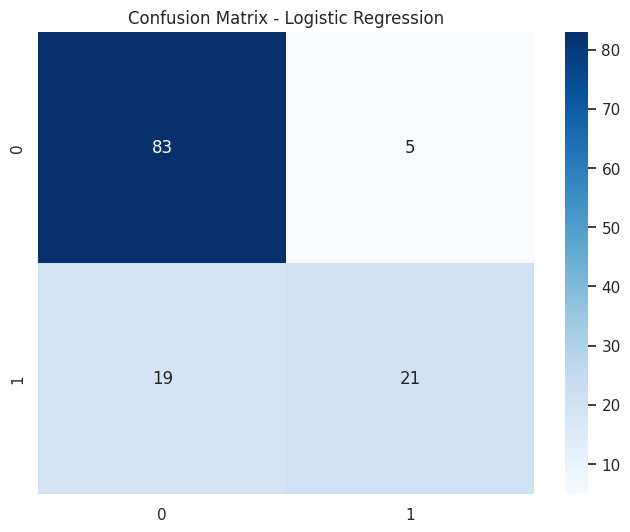

In [25]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

In [26]:
# Step 11: Cross-Validation for Best Model
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f"\nCross-Validation Scores for {best_model_name}: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.2f}")


Cross-Validation Scores for Logistic Regression: [0.78125    0.75590551 0.78740157 0.81889764 0.80314961]
Mean CV Score: 0.79


In [27]:
joblib.dump(best_model, "best_model.pkl")
print("\nBest Model Saved as 'best_model.pkl'")


Best Model Saved as 'best_model.pkl'


In [28]:
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f"\nCross-Validation Scores for {best_model_name}: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.2f}")


Sample Predictions: [0 1 0 1 0]
Actual Labels: [0 1 1 1 0]


In [29]:
# Step 14: Feature Importance (if applicable)
if hasattr(best_model, "feature_importances_"):
    feature_importance = pd.Series(best_model.feature_importances_, index=numeric_columns)
    feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
    plt.title("Feature Importance")
    plt.show()

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

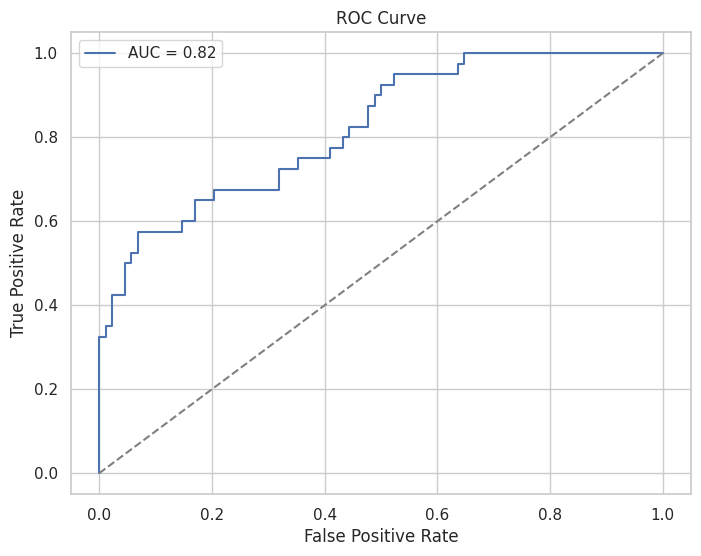

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


---

## 🧑🏻‍💻 About the Author  
**Name:** Arif Mia  

🎓 **Profession:** Machine Learning Engineer & Data Scientist  

---

### 🔭 **Career Objective**  
🚀 My goal is to contribute to groundbreaking advancements in artificial intelligence and data science, empowering companies and individuals with data-driven solutions. I strive to simplify complex challenges, craft innovative projects, and pave the way for a smarter and more connected future.  

🔍 As a **Machine Learning Engineer** and **Data Scientist**, I am passionate about using machine learning, deep learning, computer vision, and advanced analytics to solve real-world problems. My expertise lies in delivering impactful solutions by leveraging cutting-edge technologies.  

---

### 💻 **Skills**  
- 🤖 **Artificial Intelligence & Machine Learning**  
- 👁️‍🗨️ **Computer Vision & Predictive Analytics**  
- 🧠 **Deep Learning & Natural Language Processing (NLP)**  
- 🐍 **Python Programming & Automation**  
- 📊 **Data Visualization & Analysis**  
- 🚀 **End-to-End Model Development & Deployment**  

---

### 🚧 **Featured Projects**  

📊 **Lung Cancer Prediction with Deep Learning**  
Achieved 99% accuracy in a computer vision project using 12,000 medical images across three classes. This project involved data preprocessing, visualization, and model training to detect cancer effectively.  

🌾 **Ghana Crop Disease Detection Challenge**  
Developed a model using annotated images to identify crop diseases with bounding boxes, addressing real-world agricultural challenges and disease mitigation.  

🛡️ **Global Plastic Waste Analysis**  
Utilized GeoPandas, Matplotlib, and machine learning models like RandomForestClassifier and CatBoostClassifier to analyze trends in plastic waste management.  

🎵 **Twitter Emotion Classification**  
Performed exploratory data analysis and built a hybrid machine learning model to classify Twitter sentiments, leveraging text data preprocessing and visualization techniques.  

---

### ⚙️ **Technical Skills**  

- 💻 **Programming Languages:** Python 🐍, SQL 🗃️, R 📈  
- 📊 **Data Visualization Tools:** Matplotlib 📉, Seaborn 🌊, Tableau 📊, Power BI 📊  
- 🧠 **Machine Learning & Deep Learning:** Scikit-learn 🤖, TensorFlow 🔥, PyTorch 🧩  
- 🗂️ **Big Data Technologies:** Hadoop 🏗️, Spark ⚡  
- 🚀 **Model Deployment:** Flask 🌐, FastAPI ⚡, Docker 🐳  

---

### 🌐 **Connect with Me**  

📧 **Email:** arifmiahcse@gmail.com 

🔗 **LinkedIn:** [www.linkedin.com/in/arif-miah-8751bb217](#)  

🐱 **GitHub:** [https://github.com/Arif-miad](#)  

📝 **Kaggle:** [https://www.kaggle.com/arifmia](#)  

🚀 Let’s turn ideas into reality! If you’re looking for innovative solutions or need collaboration on exciting projects, feel free to reach out.  

---

How does this look? Feel free to suggest changes or updates! 😊

<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #4c4cff; max-width: 900px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">How does this look? Feel free to suggest changes or updates! 😊</h2>